# Data Science - Project

For this project I chose Airbnb-Lisbon 2019 dataset, and will be mainly interested in finding the answers to the following questions:

* 1) How does price fluctuate over time?;
* 2) What is the availability trend over time?;
* 3) What type of listings do we have in Lisbon? - price range, house types and listings by neighbourood;
* 4) How is availability related wity price, host type, number of reviews and scores, and room type?;
* 5) Price preditction - main factors influencing price.

In this analysis I'll be considering only the following files from the original dataset:
* _listings_complete.csv_ - Detailed Listings data for Lisbon
* _calendar.csv_ - Detailed Calendar Data for listings in Lisbon with availability and price evolution per listing by date
* _listings.csv_ - Lite version of _listings_complete.csv_ , it will be used only to understand what type of listings are available in Lisbon (Q3)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
import missingno as msno
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

---

### I) Looking at the Data

#### I.1) listings_complete.csv

In [2]:
# Loading data
pd.options.display.max_columns = None
listings = pd.read_csv('Data/listings_complete.csv')
listings_raw = listings.copy()

C:\Users\ALMEIDAL2\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6499,https://www.airbnb.com/rooms/6499,20190626174357,2019-06-27,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...",none,"To get to the city center, tram 15 stops in f...",Late check in's (after 20H) have an extra char...,The apartment is on the same street as the #15...,The entire apartment is at your disposal.,We'll check you in personally,Respect the neighbours.,NaN,NaN,https://a0.muscache.com/im/pictures/6422ee92-c...,NaN,14455,https://www.airbnb.com/users/show/14455,Bruno,2009-04-22,"Brussels, Bruxelles, Belgium","I am Bruno Luis, a Portuguese living in The Ha...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/14455/profile...,https://a0.muscache.com/im/users/14455/profile...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Lisbon, Lisbon, Portugal",Belém,Belm,Lisboa,Lisbon,Lisbon,1300,Lisbon,"Lisbon, Portugal",PT,Portugal,38.69675,-9.19840,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",377.0,$36.00,$209.00,$579.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,today,t,5,12,17,285,2019-06-27,10,1,2014-09-02,2019-05-21,98.0,10.0,8.0,10.0,10.0,10.0,10.0,t,NaN,"{Lisbon,"" PT Zipcodes"","" Lisbon"","" PT""}",t,f,moderate,f,f,1,1,0,0,0.17
1,25659,https://www.airbnb.com/rooms/25659,20190626174357,2019-06-26,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",Heart of Alfama! Center of Lisbon. Sunny Char...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Center of Lisbon. Sunny Char...,none,Alfama is the oldest and most picturesque quar...,Check in after 3 PM although we try to accommo...,The apartment is very convenient to all kinds ...,Normal Check in after 15h (3 PM) although we t...,I am available by email ( or in person if I am...,No smoking. No pets. Only booked guests are en...,NaN,NaN,https://a0.muscache.com/im/pictures/a4c86b5f-c...,NaN,107347,https://www.airbnb.com/users/show/107347,Ellie,2010-04-12,"New York, New York, United States",Artist,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/7b258922-5...,https://a0.muscache.com/im/pictures/7b258922-5...,Alfama,1.0,1.0,"['email', 'p

In [4]:
# Columns and data types
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24423 entries, 0 to 24422
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 19.8+ MB


In [5]:
listings.id.nunique()

24423

The data set contains 24423 distinct listings.

In [6]:
# Assessing columns with missing values
listings_null_columns = listings.isnull().sum()
listings_null_columns

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               25
summary                                           837
space                                            5215
description                                       190
experiences_offered                                 0
neighborhood_overview                            7963
notes                                           11774
transit                                          8122
access                                          10459
interaction                                      9930
house_rules                                     10151
thumbnail_url                                   24423
medium_url                                      24423
picture_url                                         0
xl_picture_url              

In [7]:
# Number of rows and columns with missing values
print ("Rows with missing values:", listings.isnull().any(axis=1).sum())
print ("Columns with missing values:", listings_null_columns.count())

Rows with missing values: 24423
Columns with missing values: 106


In [8]:
listings.nunique()

id                                              24423
listing_url                                     24423
scrape_id                                           1
last_scraped                                        2
name                                            23880
summary                                         20686
space                                           16893
description                                     22443
experiences_offered                                 1
neighborhood_overview                           12157
notes                                            8552
transit                                         12377
access                                           9839
interaction                                      9581
house_rules                                     10115
thumbnail_url                                       0
medium_url                                          0
picture_url                                     24139
xl_picture_url              

In [9]:
listings.require_guest_phone_verification.value_counts()

f    23598
t      825
Name: require_guest_phone_verification, dtype: int64

Some of the columns have only missing values:
* thumbnail_url
* medium_url
* xl_picture_url
* host_acceptance_rate

while others have always the same value:
* experiences_offered
* requires_license
* has_availability

I'll address them later on.

#### I.2) calendar.csv

In [10]:
# Loading data
calendar = pd.read_csv('Data/calendar.csv')

In [11]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,224040,2019-06-26,f,$55.00,$55.00,3.0,5.0
1,138087,2019-06-27,f,$100.00,$100.00,2.0,30.0
2,138087,2019-06-28,f,$100.00,$100.00,2.0,30.0
3,138087,2019-06-29,t,$100.00,$100.00,2.0,30.0
4,138087,2019-06-30,t,$100.00,$100.00,2.0,30.0


In [12]:
# Columns and data types
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914504 entries, 0 to 8914503
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 476.1+ MB


In [13]:
# Assessing columns with missing values
calendar_null_columns = calendar.isnull().sum()
calendar_null_columns[calendar_null_columns>0]

price             215
adjusted_price    215
minimum_nights     21
maximum_nights     21
dtype: int64

In [14]:
# Number of rows and columns with missing values
print ("Rows with missing values:", calendar.isnull().any(axis=1).sum())
print ("Columns with missing values:", calendar_null_columns.count())

Rows with missing values: 236
Columns with missing values: 7


As for the __listings_complete.csv__, there are some columns (and rows) with missing values. They will be addressed later on in this notebook.

#### I.3) listings.csv

In [15]:
# Loading data
listings_lite = pd.read_csv('Data/listings.csv')

In [16]:
listings_lite.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69675,-9.19840,Entire home/apt,36,3,10,2019-05-21,0.17,1,285
1,25659,"Sunny, Alfama Sleeps 3 - Coeur d'Alfama",107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,60,3,101,2019-06-16,1.60,1,282
2,28066,ear the birds,120855,Lucia,Azambuja,Aveiras de Cima,39.14654,-8.91503,Private room,53,1,0,NaN,NaN,1,365
3,29138,Room for rent in shared house,125304,Susana,Lisboa,Areeiro,38.73634,-9.13792,Private room,71,1,0,NaN,NaN,1,365
4,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,60,3,305,2019-06-12,2.95,1,319


---

### II) Preparing Data

There are some steps that need to be performed prior to any additional analysis:
* Cleansing:
    * Removing columns/info that won't be used for interpretation, keeping those I'm interested in
    * Handling missing values (decide whether to drop them or not)
    * Converting data types & Feature Engineering
    * Standardization

#### II.1) Cleaning _listings_complete.csv_

##### II.1.1) In this first cleansing step I'll be dropping the following columns:

* Those that won't be used for interpretation
    * listing_url
    * scrape_id
    * last_scraped
    * name
    * calculated_host_listings_count
    * calculated_host_listings_count_entire_homes
    * calculated_host_listings_count_private_rooms
    * calculated_host_listings_count_shared_rooms
    * calendar_last_scraped
    * license
    * jurisdiction_names
    * first_review
    * last_review
    * calendar_updated
    * host_url
    * host_name
    * host_thumbnail_url
    * host_picture_url
    * host_neighbourhood
    * host_verifications
    * street
    * neighbourhood
    * neighbourhood_group_cleansed
    * state
    * zipcode
    * market
    * smart_location
    * latitude
    * longitude
    * host_location
    * is_location_exact
    * city

* Columns having only missing values (or with a very high percentage of missing values)
    * thumbnail_url
    * medium_url
    * xl_picture_url
    * host_acceptance_rate
    * picture_url
    * square_feet
    * weekly_price
    * monthly_price

* Columns with just 1 unique value
    * is_business_travel_ready
    * requires_license
    * has_availability
    * country
    * country_code
    * experiences_offered

In [17]:
# Creating a copy of the original dataframe (for later analysis)
listings_raw = listings.copy()

In [18]:
# Temp
listings = listings_raw.copy()

In [19]:
# Dropping unused columns, columns having only missing values and columns with 
listings.drop(['listing_url',
               'scrape_id',
               'last_scraped',
               'name',
               'thumbnail_url',
               'medium_url',
               'xl_picture_url',
               'host_acceptance_rate',
               'picture_url',
               'calculated_host_listings_count',
               'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms',
               'calculated_host_listings_count_shared_rooms',
               'calendar_last_scraped',
               'is_business_travel_ready',
               'requires_license',
               'has_availability',
               'experiences_offered',
               'country_code',
               'square_feet',
               'weekly_price',
               'monthly_price',
               'country',
               'license',
               'jurisdiction_names',
               'first_review',
               'last_review',
               'calendar_updated',
               'host_url',
               'host_name',
               'host_thumbnail_url',
               'host_picture_url',
               'host_neighbourhood',
               'host_verifications',
               'street',
               'neighbourhood',
               'neighbourhood_group_cleansed',
               'state',
               'zipcode',
               'market',
               'smart_location',
               'latitude',
               'longitude',
               'host_location',
               'is_location_exact',
               'city'
              ],inplace=True,axis=1)

In [20]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,6499,"This apartment is all about Location, next to ...",Fully furnished apartment (35m2). Small inside...,"This apartment is all about Location, next to ...","To get to the city center, tram 15 stops in f...",Late check in's (after 20H) have an extra char...,The apartment is on the same street as the #15...,The entire apartment is at your disposal.,We'll check you in personally,Respect the neighbours.,14455,2009-04-22,"I am Bruno Luis, a Portuguese living in The Ha...",within an hour,100%,f,1.0,1.0,t,f,Belm,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",$36.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,5,12,17,285,10,1,98.0,10.0,8.0,10.0,10.0,10.0,10.0,t,moderate,f,f,0.17
1,25659,Heart of Alfama! Center of Lisbon. Sunny Char...,Charming sunny apartment in the heart of Alfam...,Heart of Alfama! Center of Lisbon. Sunny Char...,Alfama is the oldest and most picturesque quar...,Check in after 3 PM although we try to accommo...,The apartment is very convenient to all kinds ...,Normal Check in after 15h (3 PM) although we t...,I am available by email ( or in person if I am...,No smoking. No pets. Only booked guests are en...,107347,2010-04-12,Artist,within an hour,100%,t,1.0,1.0,t,t,Santa Maria Maior,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,$30.00,2,$0.00,3,21,3,3,21,21,3.0,21.0,5,8,13,282,101,17,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,f,f,1.60
2,28066,NaN,traditional farm house in a quiet place where ...,traditional farm house in a quiet place where ...,NaN,NaN,NaN,NaN,NaN,NaN,120855,2010-05-08,NaN,NaN,NaN,f,1.0,1.0,t,f,Aveiras de Cima,House,Private room,2,NaN,1.0,NaN,Real Bed,{},$53.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
3,29138,NaN,"05 minutes from city center by subway, 10 minu...","05 minutes from city center by subway, 10 minu...",NaN,NaN,NaN,NaN,NaN,NaN,125304,2010-05-15,NaN,NaN,NaN,f,1.0,1.0,t,f,Areeiro,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},$71.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN
4,29248,NaN,"Located in the city center, and great location...","Located in the city center, and great location...",NaN,NaN,NaN,NaN,NaN,Check-out time no later then: 12pm Check-in ti...,125768,2010-05-16,Hi!\r\n\r\nI'm a marketeer working for a susta...,within a few hours,100%,f,3.0,3.0,t,f,Santa Maria Maior,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$40.00,2,$10.00,3,365,3,3,365,365,3.0,365.0,4,14,44,319,305,42,91.0,10.0,9.0,10.0,10.0,10.0,10.0,t,moderate,f,f,2.95


In [21]:
listings.isnull().sum()

id                                      0
summary                               837
space                                5215
description                           190
neighborhood_overview                7963
notes                               11774
transit                              8122
access                              10459
interaction                          9930
house_rules                         10151
host_id                                 0
host_since                             16
host_about                          10016
host_response_time                   2686
host_response_rate                   2686
host_is_superhost                      16
host_listings_count                    16
host_total_listings_count              16
host_has_profile_pic                   16
host_identity_verified                 16
neighbourhood_cleansed                  0
property_type                           0
room_type                               0
accommodates                      

In [22]:
listings.nunique()

id                                  24423
summary                             20686
space                               16893
description                         22443
neighborhood_overview               12157
notes                                8552
transit                             12377
access                               9839
interaction                          9581
house_rules                         10115
host_id                             11065
host_since                           2816
host_about                           5453
host_response_time                      4
host_response_rate                     58
host_is_superhost                       2
host_listings_count                    81
host_total_listings_count              81
host_has_profile_pic                    2
host_identity_verified                  2
neighbourhood_cleansed                126
property_type                          38
room_type                               3
accommodates                      

##### II.1.2) Now that I've dropped all the unused columns and the columns having only missing values, let's look again at the data and  reorganize information (feature engineering) and handle remaining missing values

* Converting descriptive fields to binary

In [23]:
# For the sake of simplicity I'll not analyze text, I will convert descriptive fields to binary (1 meaning a description is available in a specific column/field, 0 otherwise) instead
def conv_desc(x):
    """
    This function will convert a string (descriptive field) into binary output:
    - 0: no description available
    - 1: there is a description available
    
    Parameter:
    x: string with description (string)
    
    Returns:
    binary: 1 meaning a description is available in a specific column/field, 0 otherwise
    """
    if pd.isnull(x):
        return 0
    else:
        return 1

In [24]:
# Apply conversion
col_desc = ['summary','space','description','neighborhood_overview','notes','transit','access','interaction','house_rules','host_about']
for col in col_desc:
    listings[col] = listings[col].apply(conv_desc)

* Converting dates to unix time

In [25]:
# Converting host_since to unix time
listings['host_since']=pd.to_datetime(listings['host_since']).astype(np.int64)/1000000

* Analysing _host_response_time_ - categorical feature

In [26]:
# Possible values
listings.host_response_time.value_counts()

within an hour        17123
within a few hours     2846
within a day           1400
a few days or more      368
Name: host_response_time, dtype: int64

In [27]:
# Applying one-hot-encoding
listings = pd.get_dummies(listings, columns=['host_response_time'])

* Analysing _host_response_rate_ - numerical feature (percentage)

In [28]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,6499,1,1,1,1,1,1,1,1,1,14455,1.240358e+12,1,100%,f,1.0,1.0,t,f,Belm,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",$36.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,5,12,17,285,10,1,98.0,10.0,8.0,10.0,10.0,10.0,10.0,t,moderate,f,f,0.17,0,0,0,1
1,25659,1,1,1,1,1,1,1,1,1,107347,1.271030e+12,1,100%,t,1.0,1.0,t,t,Santa Maria Maior,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,$30.00,2,$0.00,3,21,3,3,21,21,3.0,21.0,5,8,13,282,101,17,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t,moderate,f,f,1.60,0,0,0,1
2,28066,0,1,1,0,0,0,0,0,0,120855,1.273277e+12,0,NaN,f,1.0,1.0,t,f,Aveiras de Cima,House,Private room,2,NaN,1.0,NaN,Real Bed,{},$53.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN,0,0,0,0
3,29138,0,1,1,0,0,0,0,0,0,125304,1.273882e+12,0,NaN,f,1.0,1.0,t,f,Areeiro,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},$71.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,f,NaN,0,0,0,0
4,29248,0,1,1,0,0,0,0,0,1,125768,1.273968e+12,1,100%,f,3.0,3.0,t,f,Santa Maria Maior,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$40.00,2,$10.00,3,365,3,3,365,365,3.0,365.0,4,14,44,319,305,42,91.0,10.0,9.0,10.0,10.0,10.0,10.0,t,moderate,f,f,2.95,0,0,1,0


In [29]:
listings.host_response_rate.value_counts()

100%    16823
90%       654
99%       502
98%       371
93%       358
80%       291
97%       272
94%       236
0%        178
96%       150
70%       146
95%       135
50%       135
92%       133
88%       114
79%       113
86%       100
67%        99
83%        94
43%        88
75%        80
91%        69
87%        65
85%        58
89%        54
60%        51
71%        40
56%        30
74%        28
57%        27
73%        25
78%        23
77%        23
33%        23
25%        22
82%        15
40%        13
84%        13
68%         9
81%         9
55%         8
20%         8
10%         7
44%         6
63%         5
36%         5
30%         5
46%         5
69%         4
17%         3
54%         3
38%         2
64%         2
29%         1
58%         1
76%         1
22%         1
13%         1
Name: host_response_rate, dtype: int64

In [30]:
listings.host_response_rate.isnull().sum()

2686

In [31]:
# Function to convert percentages (type: object) to float
def conv_percent(x):
    """
    This function will convert a percentage (objecto) into a float
    
    Parameter:
    x: string with percentage
    
    Returns:
    float: percentage without '%'
    """
    if pd.isnull(x): # I will consider 0% response rate if there is no value available
        return 0.0
    else:
        return float(x.replace("%", ""));

In [32]:
# Apply function to dataframe
listings.host_response_rate = listings.host_response_rate.apply(conv_percent)

* Converting 't' and 'f' values to binary ('1' and '0', respectively).
In the cases where we have nulls, I will consider them as being false ('f'), thus being converted to '0'.

In [33]:
# Function to convert true or false to binary ('1' or '0', respectively)
def conv_truefalse(x):
    """
    This function will  convert true or false into binary ('1' or '0', respectively)
    - 0: false
    - 1: true
    
    Parameter:
    x: char with 't' or 'f'
    
    Returns:
    binary: 1 = true ; 0 = false
    """
    if pd.isnull(x):
        return 0
    else:
        if x=='f':
            return 0
        else:
            return 1

In [34]:
# Apply conversion
col_desc = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
for col in col_desc:
    listings[col] = listings[col].apply(conv_truefalse)

In [35]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,6499,1,1,1,1,1,1,1,1,1,14455,1.240358e+12,1,100.0,0,1.0,1.0,1,0,Belm,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",$36.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,5,12,17,285,10,1,98.0,10.0,8.0,10.0,10.0,10.0,10.0,1,moderate,0,0,0.17,0,0,0,1
1,25659,1,1,1,1,1,1,1,1,1,107347,1.271030e+12,1,100.0,1,1.0,1.0,1,1,Santa Maria Maior,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,$30.00,2,$0.00,3,21,3,3,21,21,3.0,21.0,5,8,13,282,101,17,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,moderate,0,0,1.60,0,0,0,1
2,28066,0,1,1,0,0,0,0,0,0,120855,1.273277e+12,0,0.0,0,1.0,1.0,1,0,Aveiras de Cima,House,Private room,2,NaN,1.0,NaN,Real Bed,{},$53.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,NaN,0,0,0,0
3,29138,0,1,1,0,0,0,0,0,0,125304,1.273882e+12,0,0.0,0,1.0,1.0,1,0,Areeiro,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},$71.00,NaN,NaN,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,NaN,0,0,0,0
4,29248,0,1,1,0,0,0,0,0,1,125768,1.273968e+12,1,100.0,0,3.0,3.0,1,0,Santa Maria Maior,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$40.00,2,$10.00,3,365,3,3,365,365,3.0,365.0,4,14,44,319,305,42,91.0,10.0,9.0,10.0,10.0,10.0,10.0,1,moderate,0,0,2.95,0,0,1,0


In [36]:
listings.isnull().sum()

id                                          0
summary                                     0
space                                       0
description                                 0
neighborhood_overview                       0
notes                                       0
transit                                     0
access                                      0
interaction                                 0
house_rules                                 0
host_id                                     0
host_since                                  0
host_about                                  0
host_response_rate                          0
host_is_superhost                           0
host_listings_count                        16
host_total_listings_count                  16
host_has_profile_pic                        0
host_identity_verified                      0
neighbourhood_cleansed                      0
property_type                               0
room_type                         

* Analysing _property_type_ - categorical feature

In [37]:
listings.property_type.value_counts()

Apartment                 18281
House                      1917
Condominium                 560
Serviced apartment          468
Villa                       446
Guesthouse                  378
Hostel                      358
Bed and breakfast           351
Loft                        281
Townhouse                   229
Boutique hotel              215
Cottage                     174
Guest suite                 165
Camper/RV                   139
Boat                         81
Tiny house                   50
Aparthotel                   50
Other                        46
Chalet                       40
Castle                       30
Bungalow                     26
Farm stay                    25
Hotel                        18
Windmill                     18
Nature lodge                 17
Cabin                        14
Casa particular (Cuba)       11
Campsite                     10
Earth house                  10
Resort                        4
Hut                           3
Dome hou

There are quite a lot different values for 'property_type'
Applying one-hot-encoding to this column would then add 38 new columns to the data set
To avoid this, I chose to replace all the property types with low samples by 'Other', creating a new group for this field 

In [38]:
# Replacing values
listings.property_type = listings.property_type.replace(['Boat','Tiny house','Aparthotel','Other','Chalet','Castle','Bungalow','Farm stay','Hotel','Windmill','Nature lodge','Cabin','Casa particular (Cuba)','Campsite','Earth house','Resort','Hut','Dome house','Tipi','Yurt','Bus','Vacation home','Houseboat','Lighthouse'],'Other')

In [39]:
listings.property_type.value_counts()

Apartment             18281
House                  1917
Condominium             560
Serviced apartment      468
Other                   461
Villa                   446
Guesthouse              378
Hostel                  358
Bed and breakfast       351
Loft                    281
Townhouse               229
Boutique hotel          215
Cottage                 174
Guest suite             165
Camper/RV               139
Name: property_type, dtype: int64

In [40]:
# Apply one-hot-encoding to property_type
listings = pd.get_dummies(listings, columns=['property_type'])

* Analysing _room_type_ - categorical feature

In [41]:
listings.room_type.value_counts()

Entire home/apt    18047
Private room        5958
Shared room          418
Name: room_type, dtype: int64

In [42]:
# Apply one-hot-encoding
listings=pd.get_dummies(listings,columns = ['room_type'])

* Analysing columns with remaining missing values: _bathrooms_ ; _bedrooms_ ; _beds_

In [43]:
# Percentage of missing
print ("> Missing values for 'bathrooms' [%]: ", listings.bathrooms.isnull().sum()/listings.shape[0]*100)
print ("> Missing values for 'bedrooms' [%]: ", listings.bedrooms.isnull().sum()/listings.shape[0]*100)
print ("> Missing values for 'beds' [%]: ", listings.beds.isnull().sum()/listings.shape[0]*100)

> Missing values for 'bathrooms' [%]:  0.1678745444867543
> Missing values for 'bedrooms' [%]:  0.05732301519059903
> Missing values for 'beds' [%]:  0.34803259222863697


In [44]:
listings[['bathrooms','bedrooms','beds']].isnull().any(axis=1).sum()

122

Taking into consideration the % of missing values, I decided to drop these 3 columns (we will be losing 122 out of 24423 which is less than 0,5% of the original samples).

In [45]:
# Dropping columns
listings=listings.dropna(subset=['bathrooms','bedrooms','beds'])

In [46]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,6499,1,1,1,1,1,1,1,1,1,14455,1.240358e+12,1,100.0,0,1.0,1.0,1,0,Belm,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",$36.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,5,12,17,285,10,1,98.0,10.0,8.0,10.0,10.0,10.0,10.0,1,moderate,0,0,0.17,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,25659,1,1,1,1,1,1,1,1,1,107347,1.271030e+12,1,100.0,1,1.0,1.0,1,1,Santa Maria Maior,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,$30.00,2,$0.00,3,21,3,3,21,21,3.0,21.0,5,8,13,282,101,17,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,moderate,0,0,1.60,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,29248,0,1,1,0,0,0,0,0,1,125768,1.273968e+12,1,100.0,0,3.0,3.0,1,0,Santa Maria Maior,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$40.00,2,$10.00,3,365,3,3,365,365,3.0,365.0,4,14,44,319,305,42,91.0,10.0,9.0,10.0,10.0,10.0,10.0,1,moderate,0,0,2.95,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,29396,1,1,1,1,1,1,1,0,1,126415,1.274054e+12,1,100.0,1,2.0,2.0,1,0,Santa Maria Maior,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,NaN,2,$20.00,2,30,2,4,30,30,2.5,30.0,3,8,13,251,212,36,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,1,2.45,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,29720,1,1,1,1,0,1,1,1,1,128075,1.274227e+12,1,100.0,1,3.0,3.0,1,0,Estrela,16,8.0,9.0,14.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...","$1,000.00",$0.00,$50.00,2,$0.00,2,730,2,2,730,730,2.0,730.0,2,3,17,260,43,19,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,1,0.42,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


* Analysing columns with remaining missing values: _security_deposit_ ; _cleaning_fee_

I will assume that when these values are missing there is no cost for these features, so I will convert missing values to 0 (impute missing values)

In [47]:
# Replacing nan with 0s
listings.security_deposit.fillna(0, inplace=True)
listings.cleaning_fee.fillna(0, inplace=True)

* Analysing columns with remaining missing values: _cancellation_policy_

As previously seen there is only one entry where _cancellation_policy_ is null, therefore I decided to drop this single row.

In [48]:
listings=listings.dropna(subset=['cancellation_policy'])

In [49]:
listings.isnull().sum()

id                                          0
summary                                     0
space                                       0
description                                 0
neighborhood_overview                       0
notes                                       0
transit                                     0
access                                      0
interaction                                 0
house_rules                                 0
host_id                                     0
host_since                                  0
host_about                                  0
host_response_rate                          0
host_is_superhost                           0
host_listings_count                        16
host_total_listings_count                  16
host_has_profile_pic                        0
host_identity_verified                      0
neighbourhood_cleansed                      0
accommodates                                0
bathrooms                         

* Analysing columns with remaining missing values:
    * _review_scores_rating_
    * _review_scores_accuracy_
    * _review_scores_cleanliness_
    * _review_scores_checkin_
    * _review_scores_communication_
    * _review_scores_location_
    * _review_scores_value_
    * _reviews_per_month_

In [50]:
listings[listings.review_scores_rating.isnull()].head(50)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
17,55116,1,1,1,0,1,0,1,1,0,259744,1.286842e+12,0,75.0,0,3.0,3.0,1,1,Avenidas Novas,2,2.0,2.0,2.0,Real Bed,"{Wifi,""Smoking allowed"",Breakfast,Elevator,""tr...",$69.00,0,0,1,$0.00,2,730,2,2,730,730,2.0,730.0,30,60,90,365,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,0.09,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18,55363,0,1,1,0,0,0,0,0,0,261438,1.287014e+12,0,0.0,0,1.0,1.0,1,0,Pvoa de Santo Adrio e Olival de Basto,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Smoking allowed"",Elevator}",$42.00,0,0,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
41,117979,1,1,1,1,1,1,1,1,1,595941,1.305590e+12,1,100.0,0,7.0,7.0,1,0,Alcabideche,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$77.00,$120.00,$25.00,3,$15.00,1,730,1,1,730,730,1.0,730.0,4,4,4,273,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
45,122572,0,1,1,0,1,0,0,1,1,614156,1.306022e+12,1,100.0,0,1.0,1.0,1,0,So Domingos de Benfica,1,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Doorman,Elevator,...",$65.00,$300.00,$10.00,1,$20.00,1,3,1,1,3,3,1.0,3.0,23,53,83,83,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,moderate,1,1,NaN,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
49,125835,0,1,1,0,0,0,0,0,0,624965,1.306282e+12,0,0.0,0,1.0,1.0,0,0,Vila Franca de Xira,2,2.0,1.0,1.0,Real Bed,"{Wifi,""Smoking allowed"",""Pets live on this pro...",$50.00,0,0,1,$0.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
60,136433,0,1,1,0,0,0,0,0,1,667914,1.307232e+12,0,0.0,0,1.0,1.0,1,0,Algueiro-Mem Martins,1,1.0,1.0,1.0,Real Bed,"{""Cable TV"",Kitchen,""Free parking on premises""...",$40.00,0,0,1,$35.00,1,730,1,1,730,730,1.0,730.0,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,flexible,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
69,143882,1,1,1,1,1,1,1,1,1,697596,1.307923e+12,1,0.0,0,1.0,1.0,1,1,Alvalade,3,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Elevator,Essentials}",$500.00,0,0,1,$0.00,1,1,1,1,1,1,1.0,1.0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,strict_14_with_grace_period,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
103,179273,1,1,1,0,0,1,0,0,0,544047,1.304035e+12,1,100.0,0,2.0,2.0,1,0,Barcarena,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Essentials,""Garden or backyar...",$17.00,0,0,1,$0.00,1,730,1,1,730,730,1.0,730.0,0,0,0,0,0,0,NaN,NaN,N

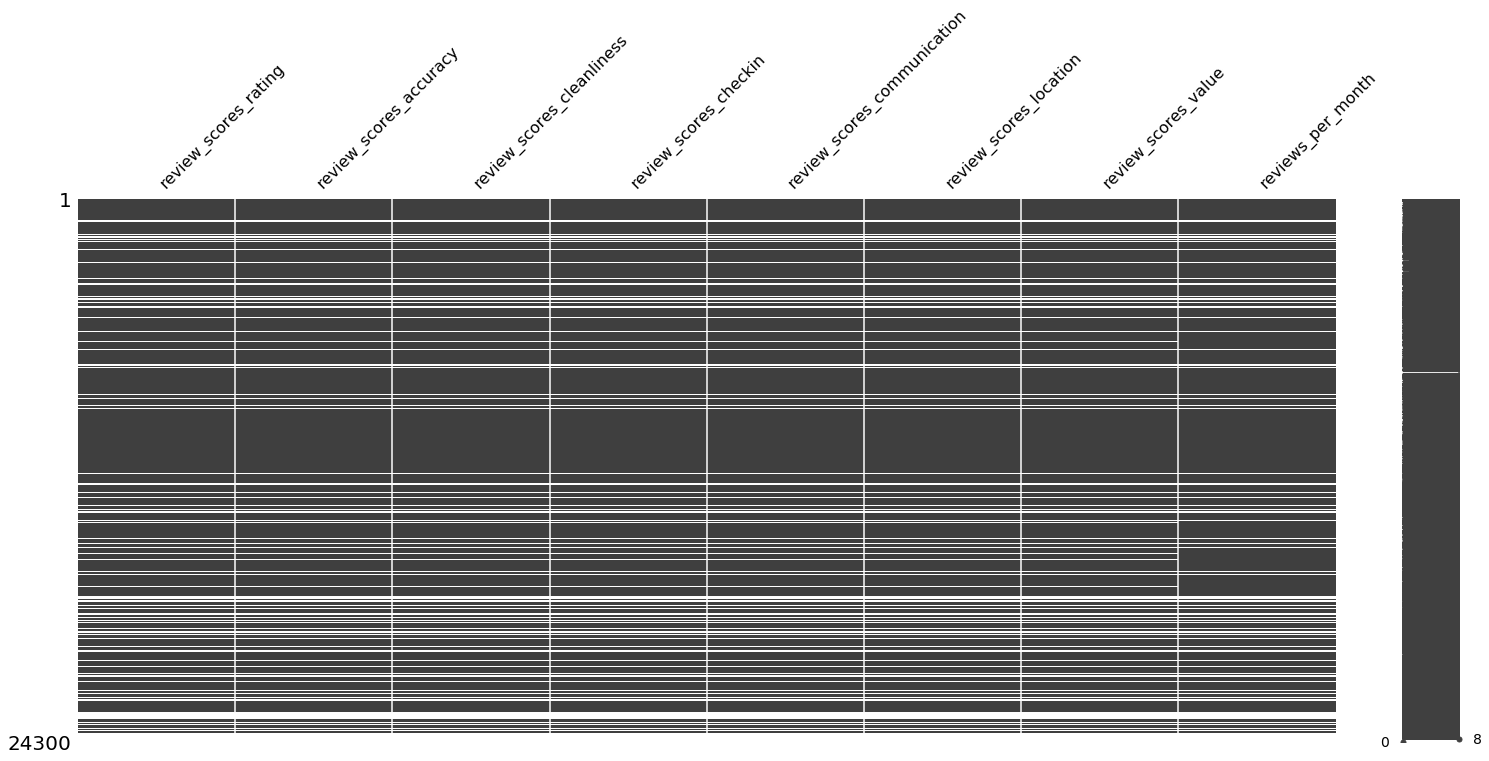

In [51]:
msno.matrix(listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']])

In [52]:
listings.review_scores_rating.value_counts()

100.0    3404
97.0     1494
96.0     1477
95.0     1434
98.0     1430
93.0     1391
90.0     1142
94.0     1081
99.0      904
92.0      898
91.0      803
80.0      741
89.0      580
87.0      508
88.0      508
85.0      324
86.0      286
84.0      240
83.0      211
60.0      183
82.0      135
70.0      102
81.0       63
76.0       61
73.0       58
77.0       57
78.0       57
75.0       53
40.0       43
20.0       37
74.0       36
67.0       33
79.0       29
72.0       20
71.0       19
68.0       13
50.0       13
64.0        7
65.0        6
69.0        6
55.0        5
53.0        5
66.0        5
63.0        3
57.0        3
30.0        2
47.0        2
45.0        1
44.0        1
58.0        1
Name: review_scores_rating, dtype: int64

It seems the missing values for all of these columns/features occur in the same samples (as we can see in the matrix above).
As a customer, if a certain offer doesn't have any review scores available it might end up influencing my decision of buying/booking it or not, therefore I decided to keep all of these rows with missing values as it might bring useful information. Thus, instead of dropping these rows, I will replace the missing values with -1.

In [53]:
def impute_missing_review(x):
    """
    This function will impute missing values for review_scores_* columns
    - x: if x is not null
    - -1: if x is null
    
    Parameter:
    x: review_scores_* value
    
    Returns:
    float: -1 if x is null ; x if x is not null
    """
    if pd.isnull(x):
        return -1.0
    else:
        return x

In [54]:
# Apply function to review_scores columns
cols = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']
for col in cols:
    listings[col] = listings[col].apply(impute_missing_review)

* Analysing columns with remaining missing values: _host_listings_count_ ; _host_total_listings_count_

In [55]:
listings.isnull().sum()

id                                        0
summary                                   0
space                                     0
description                               0
neighborhood_overview                     0
notes                                     0
transit                                   0
access                                    0
interaction                               0
house_rules                               0
host_id                                   0
host_since                                0
host_about                                0
host_response_rate                        0
host_is_superhost                         0
host_listings_count                      16
host_total_listings_count                16
host_has_profile_pic                      0
host_identity_verified                    0
neighbourhood_cleansed                    0
accommodates                              0
bathrooms                                 0
bedrooms                        

In [56]:
listings[listings.host_listings_count.isnull()]

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
16932,26115711,1,1,1,1,1,1,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Santo Antnio,8,3.0,3.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$130.00,$300.00,$55.00,4,$20.00,2,1125,2,2,1125,1125,2.0,1125.0,7,24,52,83,75,74,96.0,9.0,10.0,9.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,6.03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17271,26549169,1,1,1,1,1,0,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Misericrdia,4,1.0,0.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$90.00,$300.00,$45.00,2,$20.00,1,1125,1,1,1125,1125,1.0,1125.0,18,40,61,313,75,75,92.0,9.0,10.0,9.0,10.0,10.0,9.0,1,strict_14_with_grace_period,0,0,6.74,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17464,26767420,1,1,1,0,1,0,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Estrela,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",$60.00,$250.00,$40.00,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,16,33,48,321,33,33,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,strict_14_with_grace_period,0,0,2.93,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17511,26800518,1,1,1,0,1,0,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Estrela,4,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$50.00,$300.00,$42.00,2,$20.00,1,1125,1,1,1125,1125,1.0,1125.0,24,54,84,352,43,43,93.0,10.0,10.0,10.0,10.0,9.0,9.0,1,strict_14_with_grace_period,0,0,3.94,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17514,26804363,1,1,1,0,1,0,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Estrela,8,1.5,3.0,4.0,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",Heating...",$85.00,$300.00,$55.00,4,$20.00,1,1125,1,1,1125,1125,1.0,1125.0,13,43,73,171,28,28,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1,strict_14_with_grace_period,0,0,2.56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17541,26833975,1,1,1,0,1,0,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Estrela,4,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$50.00,$300.00,$42.00,2,$20.00,1,1125,1,1,1125,1125,1.0,1125.0,22,52,82,357,47,47,96.0,10.0,10.0,10.0,10.0,9.0,9.0,1,strict_14_with_grace_period,0,0,4.20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17553,26844351,1,1,1,0,1,0,1,1,0,192473183,-9.223372e+12,0,0.0,0,NaN,NaN,0,0,Estrela,4,1.0,1.0,2.0,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",""...",$50.00,$300.00,$42.00,2,$20.00,1,1125,1,1,1125,1125,1.0,1125.0,24,54,84,359,42,42,96.0,10.0,10.0,9.0,10.0,9.0,9.0,1,strict_14_with_grac

The missing values for both columns occur in the same rows.
In this case, it doens't make sense to impute these missing values with '0'. It doens't make sense either to replace them with '1' since there is at least one host (host_id = '192473183') with several listings.
Instead of dropping these rows, I will replace the missing values with -1.

In [57]:
# Replacing missing values with -1
listings.host_listings_count.fillna(-1, inplace=True)
listings.host_total_listings_count.fillna(-1, inplace=True)

In [58]:
listings.isnull().sum()

id                                       0
summary                                  0
space                                    0
description                              0
neighborhood_overview                    0
notes                                    0
transit                                  0
access                                   0
interaction                              0
house_rules                              0
host_id                                  0
host_since                               0
host_about                               0
host_response_rate                       0
host_is_superhost                        0
host_listings_count                      0
host_total_listings_count                0
host_has_profile_pic                     0
host_identity_verified                   0
neighbourhood_cleansed                   0
accommodates                             0
bathrooms                                0
bedrooms                                 0
beds       

In [59]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,6499,1,1,1,1,1,1,1,1,1,14455,1.240358e+12,1,100.0,0,1.0,1.0,1,0,Belm,3,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""First ai...",$36.00,$100.00,$35.00,2,$15.00,3,365,3,3,365,365,3.0,365.0,5,12,17,285,10,1,98.0,10.0,8.0,10.0,10.0,10.0,10.0,1,moderate,0,0,0.17,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,25659,1,1,1,1,1,1,1,1,1,107347,1.271030e+12,1,100.0,1,1.0,1.0,1,1,Santa Maria Maior,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,$30.00,2,$0.00,3,21,3,3,21,21,3.0,21.0,5,8,13,282,101,17,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,moderate,0,0,1.60,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,29248,0,1,1,0,0,0,0,0,1,125768,1.273968e+12,1,100.0,0,3.0,3.0,1,0,Santa Maria Maior,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Paid parking off pr...",$60.00,$0.00,$40.00,2,$10.00,3,365,3,3,365,365,3.0,365.0,4,14,44,319,305,42,91.0,10.0,9.0,10.0,10.0,10.0,10.0,1,moderate,0,0,2.95,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,29396,1,1,1,1,1,1,1,0,1,126415,1.274054e+12,1,100.0,1,2.0,2.0,1,0,Santa Maria Maior,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$60.00,$150.00,0,2,$20.00,2,30,2,4,30,30,2.5,30.0,3,8,13,251,212,36,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,1,2.45,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,29720,1,1,1,1,0,1,1,1,1,128075,1.274227e+12,1,100.0,1,3.0,3.0,1,0,Estrela,16,8.0,9.0,14.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...","$1,000.00",$0.00,$50.00,2,$0.00,2,730,2,2,730,730,2.0,730.0,2,3,17,260,43,19,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,1,0.42,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


* Analysing remaining categorical features: _bed_type_

In [60]:
# One-hot-encoding
listings=pd.get_dummies(listings, columns=['bed_type'])

* Analysing remaining categorical features: _amenities_

In [61]:
# Deriving variables from amenities
amenities_list = listings['amenities'].str.strip('{}').str.replace('"', '').str.replace('(','').str.replace(')','').str.split(',')

In [62]:
amenities_list

0        [TV, Cable TV, Internet, Wifi, Kitchen, First ...
1        [TV, Cable TV, Internet, Wifi, Kitchen, Paid p...
4        [TV, Internet, Wifi, Kitchen, Paid parking off...
5        [TV, Cable TV, Internet, Wifi, Kitchen, Paid p...
6        [Cable TV, Internet, Wifi, Air conditioning, K...
7        [TV, Cable TV, Wifi, Air conditioning, Wheelch...
8        [TV, Cable TV, Internet, Wifi, Paid parking of...
9        [TV, Cable TV, Wifi, Kitchen, Paid parking off...
11       [TV, Cable TV, Wifi, Kitchen, Indoor fireplace...
12       [TV, Cable TV, Internet, Wifi, Kitchen, Free s...
13       [TV, Cable TV, Wifi, Kitchen, Free parking on ...
14       [TV, Cable TV, Wifi, Wheelchair accessible, Po...
15       [TV, Cable TV, Internet, Wifi, Kitchen, Smokin...
17       [Wifi, Smoking allowed, Breakfast, Elevator, t...
18                   [TV, Wifi, Smoking allowed, Elevator]
19       [Wifi, Wheelchair accessible, Free parking on ...
20       [TV, Internet, Wifi, Kitchen, Free parking on .

In [63]:
amenities_unique = []

for i in amenities_list:
    for amenity in i:
        if amenity not in amenities_unique and amenity!='':
            amenities_unique.append(amenity)

In [64]:
amenities_unique

['TV',
 'Cable TV',
 'Internet',
 'Wifi',
 'Kitchen',
 'First aid kit',
 'Fire extinguisher',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Hair dryer',
 'Iron',
 'Hot water',
 'Bed linens',
 'Extra pillows and blankets',
 'Ethernet connection',
 'Microwave',
 'Coffee maker',
 'Refrigerator',
 'Dishwasher',
 'Dishes and silverware',
 'Cooking basics',
 'Oven',
 'Stove',
 'Long term stays allowed',
 'Paid parking off premises',
 'Heating',
 'Washer',
 'Smoke detector',
 'Laptop friendly workspace',
 'Luggage dropoff allowed',
 'Family/kid friendly',
 'Host greets you',
 'Dryer',
 '24-hour check-in',
 'Crib',
 'Single level home',
 'Waterfront',
 'Air conditioning',
 'Smoking allowed',
 'Breakfast',
 'Elevator',
 'Indoor fireplace',
 'Suitable for events',
 'High chair',
 'Wheelchair accessible',
 'Hot tub',
 'Buzzer/wireless intercom',
 'Pets allowed',
 'Carbon monoxide detector',
 'Safety card',
 'Self check-in',
 'Keypad',
 'Private entrance',
 'Pets live on this property',
 'Dogs',
 'Cats

In [65]:
listings['amenities'] = listings['amenities'].str.strip('{}').str.replace('"', '').str.replace(',',' ').str.replace('(','').str.replace(')','')
listings['amenities'] = listings['amenities'].map(str)

In [66]:
for amenity in amenities_unique:
    listings['Amenity_'+amenity]=listings.amenities.str.contains(amenity)

In [67]:
# Converting true to '1' and false to '0'
for amenity in amenities_unique:
    listings['Amenity_'+amenity]=(listings['Amenity_'+amenity]==True).astype(int)

In [68]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wifi,Amenity_Kitchen,Amenity_First aid kit,Amenity_Fire extinguisher,Amenity_Essentials,Amenity_Shampoo,Amenity_Hangers,Amenity_Hair dryer,Amenity_Iron,Amenity_Hot water,Amenity_Bed linens,Amenity_Extra pillows and blankets,Amenity_Ethernet connection,Amenity_Microwave,Amenity_Coffee maker,Amenity_Refrigerator,Amenity_Dishwasher,Amenity_Dishes and silverware,Amenity_Cooking basics,Amenity_Oven,Amenity_Stove,Amenity_Long term stays allowed,Amenity_Paid parking off premises,Amenity_Heating,Amenity_Washer,Amenity_Smoke detector,Amenity_Laptop friendly workspace,Amenity_Luggage dropoff allowed,Amenity_Family/kid friendly,Amenity_Host greets you,Amenity_Dryer,Amenity_24-hour check-in,Amenity_Crib,Amenity_Single level home,Amenity_Waterfront,Amenity_Air conditioning,Amenity_Smoking allowed,Amenity_Breakfast,Amenity_Elevator,Amenity_Indoor fireplace,Amenity_Suitable for events,Amenity_High chair,Amenity_Wheelchair accessible,Amenity_Hot tub,Amenity_Buzzer/wireless intercom,Amenity_Pets allowed,Amenity_Carbon monoxide detector,Amenity_Safety card,Amenity_Self check-in,Amenity_Keypad,Amenity_Private entrance,Amenity_Pets live on this property,Amenity_Dogs,Amenity_Cats,Amenity_Other pets,Amenity_translation missing: en.hosting_amenity_49,Amenity_translation missing: en.hosting_amenity_50,Amenity_Building staff,Amenity_Pack ’n Play/travel crib,Amenity_Patio or balcony,Amenity_Paid parking on premises,Amenity_Bathtub,Amenity_BBQ grill,Amenity_Garden or backyard,Amenity_Beach essentials,Amenity_Beachfront,Amenity_Free street parking,Amenity_Stair gates,Amenity_Children’s books and toys,Amenity_Room-darkening shades,Amenity_Free parking on premises,Amenity_Pool,Amenity_Lock on bedroom door,Amenity_Cleaning before checkout,Amenity_Private living room,Amenity_Pocket wifi,Amenity_Wide hallways,Amenity_Wide entrance for guests,Amenity_Well-lit path to entrance,Amenity_No stairs or steps to enter,Amenity_Accessible-height bed,Amenity_Accessible-height toilet,Amenity_Wide entryway,Amenity_Handheld shower head,Amenity_Doorman,Amenity_Babysitter recommendations,Amenity_Children’s dinnerware,Amenity_Flat path to guest entrance,Amenity_Wide entrance,Amenity_Extra space around bed,Amenity_Outlet covers,Amenity_Baby bath,Amenity_Wide doorway to guest bathroom,Amenity_Wide clearance to shower,Amenity_ toilet,Amenity_Table co

In [69]:
listings.shape

(24300, 273)

After extracting deriving variables from amenities we end up with 273 columns.
Let's check how they appear in this data set.

In [70]:
df = pd.DataFrame(columns=['Amenity','Count','PctTotalSamples'])
nsamples=listings.shape[0]
for amenity in amenities_unique:
    aux_counter = listings['Amenity_'+amenity].sum()
    df=df.append({'Amenity': amenity,'Count': aux_counter, 'PctTotalSamples': np.around(aux_counter/nsamples*100,decimals=3)}, ignore_index=True)

In [71]:
df = df.sort_values(by=['Count'], ascending=False)

In [72]:
df

,Amenity,Count,PctTotalSamples
3,Wifi,23439,96.457
7,Essentials,22901,94.243
4,Kitchen,22286,91.712
9,Hangers,19923,81.988
10,Hair dryer,19721,81.156
0,TV,19660,80.905
11,Iron,18104,74.502
6,Fire extinguisher,16640,68.477
27,Washer,16602,68.321
5,First aid kit,16358,67.317


Some of the amenities appear in very few listings. To reduce the number of features in the the dataset I decided do drop those which appear in less than 0,5% of all the samples.

In [73]:
amenities_to_drop = df.Amenity[df['PctTotalSamples']<0.5]

In [74]:
for amenity in amenities_to_drop:
    listings.drop(columns='Amenity_'+amenity,inplace=True)

In [75]:
listings.shape

(24300, 202)

After deriving varibles from 'amenities' column and removig those with few samples, we end up with a dataset having 24300 samples with 202 columns/features each.

In [76]:
listings.drop(columns='amenities',inplace=True)

In [77]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wifi,Amenity_Kitchen,Amenity_First aid kit,Amenity_Fire extinguisher,Amenity_Essentials,Amenity_Shampoo,Amenity_Hangers,Amenity_Hair dryer,Amenity_Iron,Amenity_Hot water,Amenity_Bed linens,Amenity_Extra pillows and blankets,Amenity_Ethernet connection,Amenity_Microwave,Amenity_Coffee maker,Amenity_Refrigerator,Amenity_Dishwasher,Amenity_Dishes and silverware,Amenity_Cooking basics,Amenity_Oven,Amenity_Stove,Amenity_Long term stays allowed,Amenity_Paid parking off premises,Amenity_Heating,Amenity_Washer,Amenity_Smoke detector,Amenity_Laptop friendly workspace,Amenity_Luggage dropoff allowed,Amenity_Family/kid friendly,Amenity_Host greets you,Amenity_Dryer,Amenity_24-hour check-in,Amenity_Crib,Amenity_Single level home,Amenity_Waterfront,Amenity_Air conditioning,Amenity_Smoking allowed,Amenity_Breakfast,Amenity_Elevator,Amenity_Indoor fireplace,Amenity_Suitable for events,Amenity_High chair,Amenity_Wheelchair accessible,Amenity_Hot tub,Amenity_Buzzer/wireless intercom,Amenity_Pets allowed,Amenity_Carbon monoxide detector,Amenity_Safety card,Amenity_Self check-in,Amenity_Keypad,Amenity_Private entrance,Amenity_Pets live on this property,Amenity_Dogs,Amenity_Cats,Amenity_translation missing: en.hosting_amenity_49,Amenity_translation missing: en.hosting_amenity_50,Amenity_Building staff,Amenity_Pack ’n Play/travel crib,Amenity_Patio or balcony,Amenity_Paid parking on premises,Amenity_Bathtub,Amenity_BBQ grill,Amenity_Garden or backyard,Amenity_Beach essentials,Amenity_Beachfront,Amenity_Free street parking,Amenity_Stair gates,Amenity_Children’s books and toys,Amenity_Room-darkening shades,Amenity_Free parking on premises,Amenity_Pool,Amenity_Lock on bedroom door,Amenity_Cleaning before checkout,Amenity_Private living room,Amenity_Pocket wifi,Amenity_Wide hallways,Amenity_Wide entrance for guests,Amenity_Well-lit path to entrance,Amenity_No stairs or steps to enter,Amenity_Accessible-height bed,Amenity_Accessible-height toilet,Amenity_Wide entryway,Amenity_Handheld shower head,Amenity_Doorman,Amenity_Babysitter recommendations,Amenity_Children’s dinnerware,Amenity_Flat path to guest entrance,Amenity_Wide entrance,Amenity_Extra space around bed,Amenity_Outlet covers,Amenity_Baby bath,Amenity_Wide doorway to guest bathroom,Amenity_Wide clearance to shower,Amenity_ toilet,Amenity_Table corner guards,Amenity_Window gu

* Currency: _price_ ; _security_deposit_ ; _cleaning_fee_ ; _extra_people_

In [78]:
curr_columns = ['price','security_deposit','cleaning_fee','extra_people']
for col in curr_columns:
    listings[col] = listings[col].apply(lambda x: float(str(x).replace('$','').replace(',','')))

In [79]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wifi,Amenity_Kitchen,Amenity_First aid kit,Amenity_Fire extinguisher,Amenity_Essentials,Amenity_Shampoo,Amenity_Hangers,Amenity_Hair dryer,Amenity_Iron,Amenity_Hot water,Amenity_Bed linens,Amenity_Extra pillows and blankets,Amenity_Ethernet connection,Amenity_Microwave,Amenity_Coffee maker,Amenity_Refrigerator,Amenity_Dishwasher,Amenity_Dishes and silverware,Amenity_Cooking basics,Amenity_Oven,Amenity_Stove,Amenity_Long term stays allowed,Amenity_Paid parking off premises,Amenity_Heating,Amenity_Washer,Amenity_Smoke detector,Amenity_Laptop friendly workspace,Amenity_Luggage dropoff allowed,Amenity_Family/kid friendly,Amenity_Host greets you,Amenity_Dryer,Amenity_24-hour check-in,Amenity_Crib,Amenity_Single level home,Amenity_Waterfront,Amenity_Air conditioning,Amenity_Smoking allowed,Amenity_Breakfast,Amenity_Elevator,Amenity_Indoor fireplace,Amenity_Suitable for events,Amenity_High chair,Amenity_Wheelchair accessible,Amenity_Hot tub,Amenity_Buzzer/wireless intercom,Amenity_Pets allowed,Amenity_Carbon monoxide detector,Amenity_Safety card,Amenity_Self check-in,Amenity_Keypad,Amenity_Private entrance,Amenity_Pets live on this property,Amenity_Dogs,Amenity_Cats,Amenity_translation missing: en.hosting_amenity_49,Amenity_translation missing: en.hosting_amenity_50,Amenity_Building staff,Amenity_Pack ’n Play/travel crib,Amenity_Patio or balcony,Amenity_Paid parking on premises,Amenity_Bathtub,Amenity_BBQ grill,Amenity_Garden or backyard,Amenity_Beach essentials,Amenity_Beachfront,Amenity_Free street parking,Amenity_Stair gates,Amenity_Children’s books and toys,Amenity_Room-darkening shades,Amenity_Free parking on premises,Amenity_Pool,Amenity_Lock on bedroom door,Amenity_Cleaning before checkout,Amenity_Private living room,Amenity_Pocket wifi,Amenity_Wide hallways,Amenity_Wide entrance for guests,Amenity_Well-lit path to entrance,Amenity_No stairs or steps to enter,Amenity_Accessible-height bed,Amenity_Accessible-height toilet,Amenity_Wide entryway,Amenity_Handheld shower head,Amenity_Doorman,Amenity_Babysitter recommendations,Amenity_Children’s dinnerware,Amenity_Flat path to guest entrance,Amenity_Wide entrance,Amenity_Extra space around bed,Amenity_Outlet covers,Amenity_Baby bath,Amenity_Wide doorway to guest bathroom,Amenity_Wide clearance to shower,Amenity_ toilet,Amenity_Table corner guards,Amenity_Window gu

* _cancellation_policy_ - categorical feature

In [80]:
listings.cancellation_policy.value_counts()

strict_14_with_grace_period    11293
moderate                        7682
flexible                        5004
super_strict_30                  173
super_strict_60                  146
strict                             2
Name: cancellation_policy, dtype: int64

In [81]:
listings = pd.get_dummies(listings, columns=['cancellation_policy'])

In [82]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wifi,Amenity_Kitchen,Amenity_First aid kit,Amenity_Fire extinguisher,Amenity_Essentials,Amenity_Shampoo,Amenity_Hangers,Amenity_Hair dryer,Amenity_Iron,Amenity_Hot water,Amenity_Bed linens,Amenity_Extra pillows and blankets,Amenity_Ethernet connection,Amenity_Microwave,Amenity_Coffee maker,Amenity_Refrigerator,Amenity_Dishwasher,Amenity_Dishes and silverware,Amenity_Cooking basics,Amenity_Oven,Amenity_Stove,Amenity_Long term stays allowed,Amenity_Paid parking off premises,Amenity_Heating,Amenity_Washer,Amenity_Smoke detector,Amenity_Laptop friendly workspace,Amenity_Luggage dropoff allowed,Amenity_Family/kid friendly,Amenity_Host greets you,Amenity_Dryer,Amenity_24-hour check-in,Amenity_Crib,Amenity_Single level home,Amenity_Waterfront,Amenity_Air conditioning,Amenity_Smoking allowed,Amenity_Breakfast,Amenity_Elevator,Amenity_Indoor fireplace,Amenity_Suitable for events,Amenity_High chair,Amenity_Wheelchair accessible,Amenity_Hot tub,Amenity_Buzzer/wireless intercom,Amenity_Pets allowed,Amenity_Carbon monoxide detector,Amenity_Safety card,Amenity_Self check-in,Amenity_Keypad,Amenity_Private entrance,Amenity_Pets live on this property,Amenity_Dogs,Amenity_Cats,Amenity_translation missing: en.hosting_amenity_49,Amenity_translation missing: en.hosting_amenity_50,Amenity_Building staff,Amenity_Pack ’n Play/travel crib,Amenity_Patio or balcony,Amenity_Paid parking on premises,Amenity_Bathtub,Amenity_BBQ grill,Amenity_Garden or backyard,Amenity_Beach essentials,Amenity_Beachfront,Amenity_Free street parking,Amenity_Stair gates,Amenity_Children’s books and toys,Amenity_Room-darkening shades,Amenity_Free parking on premises,Amenity_Pool,Amenity_Lock on bedroom door,Amenity_Cleaning before checkout,Amenity_Private living room,Amenity_Pocket wifi,Amenity_Wide hallways,Amenity_Wide entrance for guests,Amenity_Well-lit path to entrance,Amenity_No stairs or steps to enter,Amenity_Accessible-height bed,Amenity_Accessible-height toilet,Amenity_Wide entryway,Amenity_Handheld shower head,Amenity_Doorman,Amenity_Babysitter recommendations,Amenity_Children’s dinnerware,Amenity_Flat path to guest entrance,Amenity_Wide entrance,Amenity_Extra space around bed,Amenity_Outlet covers,Amenity_Baby bath,Amenity_Wide doorway to guest bathroom,Amenity_Wide clearance to shower,Amenity_ toilet,Amenity_Table corner guards,Amenity_Window guards,Amenity_Gym,Ame

---

#### II.2) Cleaning _calendar.csv_

In [83]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,224040,2019-06-26,f,$55.00,$55.00,3.0,5.0
1,138087,2019-06-27,f,$100.00,$100.00,2.0,30.0
2,138087,2019-06-28,f,$100.00,$100.00,2.0,30.0
3,138087,2019-06-29,t,$100.00,$100.00,2.0,30.0
4,138087,2019-06-30,t,$100.00,$100.00,2.0,30.0


##### II.2.1) Addressing missing values

As previously seen, this dataset has 236 rows with missing values out of 8914504 total rows, which is less than 0,01% of the original dataset. Therefore I decided to drop these rows.

In [84]:
calendar = calendar.dropna(how='any', axis='rows')

In [85]:
calendar_null_columns = calendar.isnull().sum()
calendar_null_columns

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

This dataframe no longer has missing values.

##### II.2.2) Converting 't' and 'f' to '1' and '0' respectively

For this step I'll be using the _conv_truefalse_ function defined previously.

In [86]:
calendar.available = calendar.available.apply(conv_truefalse)

In [87]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,224040,2019-06-26,0,$55.00,$55.00,3.0,5.0
1,138087,2019-06-27,0,$100.00,$100.00,2.0,30.0
2,138087,2019-06-28,0,$100.00,$100.00,2.0,30.0
3,138087,2019-06-29,1,$100.00,$100.00,2.0,30.0
4,138087,2019-06-30,1,$100.00,$100.00,2.0,30.0


In [88]:
calendar.shape[0]

8914268

##### II.2.3) Currency

In [89]:
curr_columns = ['price','adjusted_price']
for col in curr_columns:
    calendar[col] = calendar[col].apply(lambda x: float(str(x).replace('$','').replace(',','')))

In [90]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,224040,2019-06-26,0,55.0,55.0,3.0,5.0
1,138087,2019-06-27,0,100.0,100.0,2.0,30.0
2,138087,2019-06-28,0,100.0,100.0,2.0,30.0
3,138087,2019-06-29,1,100.0,100.0,2.0,30.0
4,138087,2019-06-30,1,100.0,100.0,2.0,30.0


##### II.2.4) Adding new features to the dataframe (from date feature) - week, month and year

In [91]:
# Convert date string to date format
calendar['date'] = pd.to_datetime(calendar['date'])

In [92]:
# Adding week to dataframe
calendar['date_week']=calendar['date'].dt.strftime('%U')

In [93]:
# Adding month to dataframe
calendar['date_month']=calendar['date'].dt.month

In [94]:
# Adding year to dataframe
calendar['date_year']=calendar['date'].dt.year

In [95]:
# Adding weekday to dataframe
calendar['date_weekday']=calendar['date'].dt.strftime('%A')

In [96]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_week,date_month,date_year,date_weekday
0,224040,2019-06-26,0,55.0,55.0,3.0,5.0,25,6,2019,Wednesday
1,138087,2019-06-27,0,100.0,100.0,2.0,30.0,25,6,2019,Thursday
2,138087,2019-06-28,0,100.0,100.0,2.0,30.0,25,6,2019,Friday
3,138087,2019-06-29,1,100.0,100.0,2.0,30.0,25,6,2019,Saturday
4,138087,2019-06-30,1,100.0,100.0,2.0,30.0,26,6,2019,Sunday


---

### III) Answering Questions

#### III.1) Q1: How does price fluctuate over time?
For this analysis I'll be using the data from 'calendar.csv'

In [97]:
# create new dataframe with computed average
calendar_avgprice_daily = calendar.groupby('date')['price'].mean()

Text(0.5, 1.0, 'Avg Price evolution over time - daily')

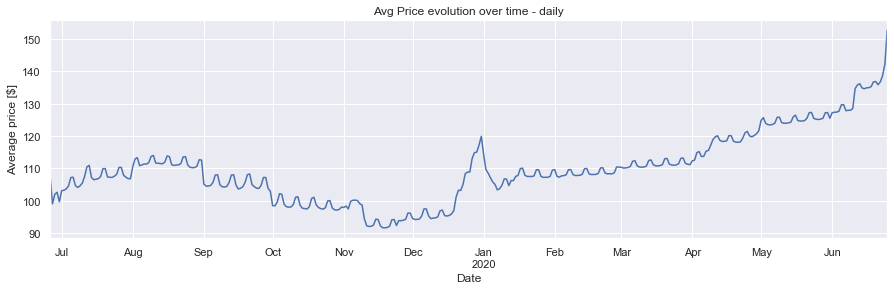

In [98]:
# plot
sns.set(rc={'figure.figsize':(15, 4)})
sns.axes_style("darkgrid")
ax = calendar_avgprice_daily.plot()
ax.set_ylabel('Average price [$]')
ax.set_xlabel('Date')
ax.set_title('Avg Price evolution over time - daily')

> For 2019, the prices decrease after Summer time until December.
Then, close to New Year's Eve, there is sudden increase in average price as it would be expected.
For 2020, the prices are considerably higher than in 2019, and seem to steadily increase from the begining of the year.

In [99]:
# Top price from 2019 (Jul-Dec)
calendar_avgprice_daily.loc['2019'].nlargest(1, keep='first')

date
2019-12-31    119.882196
Name: price, dtype: float64

In [100]:
# Top price from 2020 (Jan-Jun)
calendar_avgprice_daily.loc['2020'].nlargest(1, keep='first')

date
2020-06-25    152.618644
Name: price, dtype: float64

In [101]:
# price evolution over time - by weekday
calendar_avgprice_weekday = calendar.set_index('date',inplace=False).groupby('date_weekday')['price'].mean()

In [102]:
calendar_avgprice_weekday.head(5)

date_weekday
Friday      111.064316
Monday      109.087682
Saturday    111.246761
Sunday      109.193370
Thursday    109.524211
Name: price, dtype: float64

Text(0.5, 1.0, 'Avg Price evolution over time - by week day')

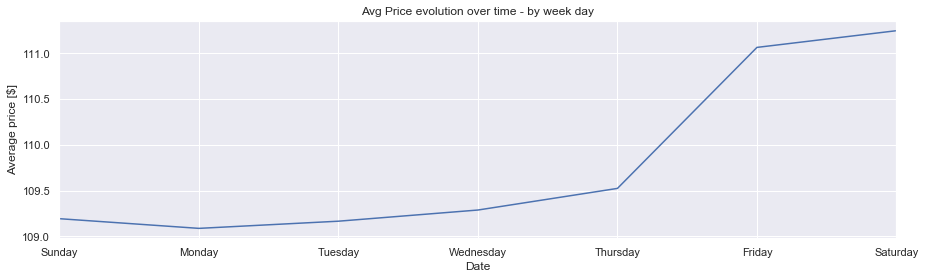

In [103]:
order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.set(rc={'figure.figsize':(15, 4)})
sns.axes_style("darkgrid")
ax = calendar_avgprice_weekday.loc[order].plot()
ax.set_ylabel('Average price [$]')
ax.set_xlabel('Date')
ax.set_title('Avg Price evolution over time - by week day')

> It is interesting to observe we have higher prices on average on Fridays and Saturdays than on the remaining weekdays (this makes sense, as a costumer I would expect higher prices on weekends)

#### III.2) Q2:  What is the availability trend over time?
For this analysis I'll be using the snapshot available from 'calendar.csv'

In [104]:
# checking availability to compute occupancy rate 
calendar_availability=calendar.groupby('date')['available'].agg(['sum','count'])
calendar_availability['pct']=(calendar_availability['count']-calendar_availability['sum'])/calendar_availability['count']

Text(0.5, 1.0, 'Availability over time (July 2019 snapshot)')

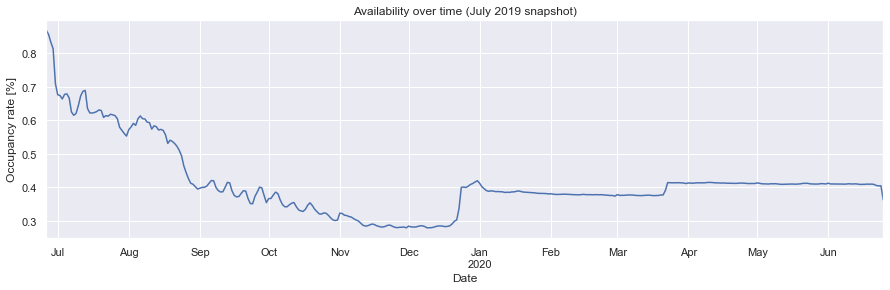

In [105]:
sns.set(rc={'figure.figsize':(15, 4)})
sns.axes_style("darkgrid")
ax = calendar_availability['pct'].plot()
ax.set_ylabel('Occupancy rate [%]')
ax.set_xlabel('Date')
ax.set_title('Availability over time (July 2019 snapshot)')

> The seasonal trends are quite obviuous when assessing occupancy rate over time:
- Occupancy rate decreases until the end of the year after Summer time;
- Then, close to the end of the year, there is a step in the occupancy rate, which is related to the New Year's Eve;
- In 2020, it seems there is a new step during March.

#### III.3) Q3: What type of listings do we have in Lisbon? - price range, house types and listings by neighbourhood
For this analysis I'll be using the snapshot available from both 'listings.csv' and 'listings_complete.csv'

Text(0.5, 1.0, 'Listings distribution by price tag')

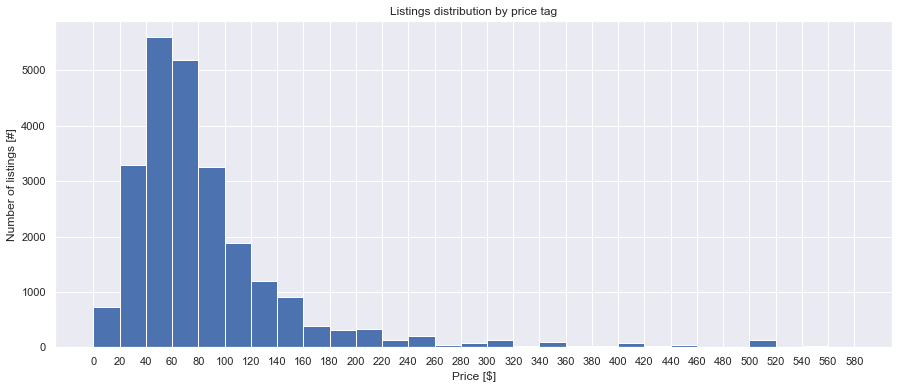

In [106]:
# Price range / distribution
sns.set(rc={'figure.figsize':(15, 6)})
x = np.arange(0,600,20)
plt.hist(listings_lite['price'],x)
plt.xticks(x)
plt.ylabel('Number of listings [#]')
plt.xlabel('Price [$]')
plt.title('Listings distribution by price tag')

> As seen in the bar chart above, most of the listings have a price tag between 20\\$ and 140\\$

Text(0.5, 1.0, 'Property and room Type Distribution')

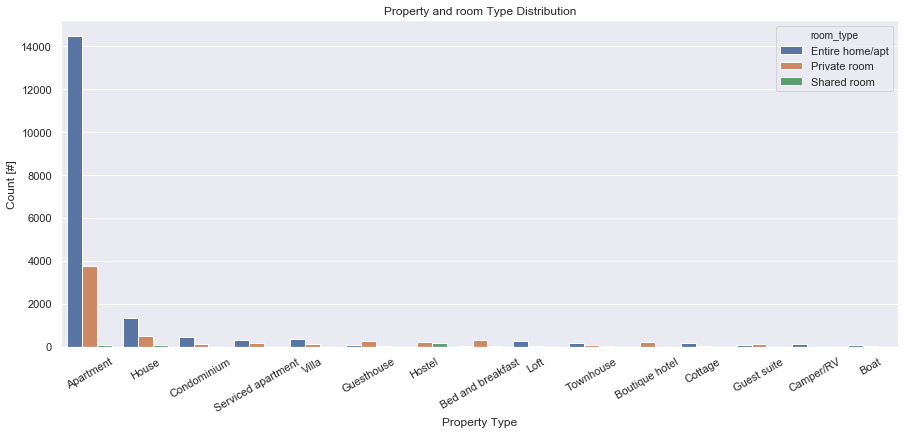

In [107]:
# Property and room types - top 15 properties by count
sns.set(rc={'figure.figsize':(15, 6)})
sns.countplot(x='property_type', hue='room_type', data=listings_raw, order = listings_raw.property_type.value_counts().iloc[:15].index);
plt.xticks(rotation=30)
plt.ylabel('Count [#]')
plt.xlabel('Property Type')
plt.title('Property and room Type Distribution')

> The most frequent property type is apartment, followed up by (entire) house

Text(0.5, 1.0, 'Property and room Type Distribution')

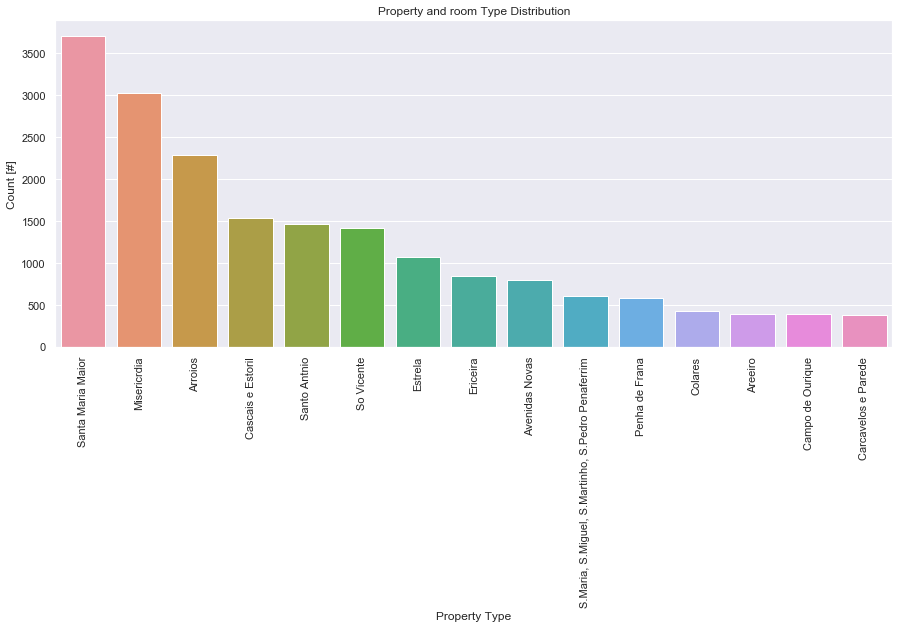

In [108]:
# Listings count by neighbourhood
sns.set(rc={'figure.figsize':(15, 6)})
sns.countplot(x='neighbourhood', data=listings_lite, order = listings_lite.neighbourhood.value_counts().iloc[:15].index)
plt.xticks(rotation=90)
plt.ylabel('Count [#]')
plt.xlabel('Property Type')
plt.title('Property and room Type Distribution')

> The top 3 neighbourhoods regarding # of listings are Santa Maria Maior, Misericordia e Arroios

In [109]:
listings.head(5)

,id,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_about,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,Amenity_TV,Amenity_Cable TV,Amenity_Internet,Amenity_Wifi,Amenity_Kitchen,Amenity_First aid kit,Amenity_Fire extinguisher,Amenity_Essentials,Amenity_Shampoo,Amenity_Hangers,Amenity_Hair dryer,Amenity_Iron,Amenity_Hot water,Amenity_Bed linens,Amenity_Extra pillows and blankets,Amenity_Ethernet connection,Amenity_Microwave,Amenity_Coffee maker,Amenity_Refrigerator,Amenity_Dishwasher,Amenity_Dishes and silverware,Amenity_Cooking basics,Amenity_Oven,Amenity_Stove,Amenity_Long term stays allowed,Amenity_Paid parking off premises,Amenity_Heating,Amenity_Washer,Amenity_Smoke detector,Amenity_Laptop friendly workspace,Amenity_Luggage dropoff allowed,Amenity_Family/kid friendly,Amenity_Host greets you,Amenity_Dryer,Amenity_24-hour check-in,Amenity_Crib,Amenity_Single level home,Amenity_Waterfront,Amenity_Air conditioning,Amenity_Smoking allowed,Amenity_Breakfast,Amenity_Elevator,Amenity_Indoor fireplace,Amenity_Suitable for events,Amenity_High chair,Amenity_Wheelchair accessible,Amenity_Hot tub,Amenity_Buzzer/wireless intercom,Amenity_Pets allowed,Amenity_Carbon monoxide detector,Amenity_Safety card,Amenity_Self check-in,Amenity_Keypad,Amenity_Private entrance,Amenity_Pets live on this property,Amenity_Dogs,Amenity_Cats,Amenity_translation missing: en.hosting_amenity_49,Amenity_translation missing: en.hosting_amenity_50,Amenity_Building staff,Amenity_Pack ’n Play/travel crib,Amenity_Patio or balcony,Amenity_Paid parking on premises,Amenity_Bathtub,Amenity_BBQ grill,Amenity_Garden or backyard,Amenity_Beach essentials,Amenity_Beachfront,Amenity_Free street parking,Amenity_Stair gates,Amenity_Children’s books and toys,Amenity_Room-darkening shades,Amenity_Free parking on premises,Amenity_Pool,Amenity_Lock on bedroom door,Amenity_Cleaning before checkout,Amenity_Private living room,Amenity_Pocket wifi,Amenity_Wide hallways,Amenity_Wide entrance for guests,Amenity_Well-lit path to entrance,Amenity_No stairs or steps to enter,Amenity_Accessible-height bed,Amenity_Accessible-height toilet,Amenity_Wide entryway,Amenity_Handheld shower head,Amenity_Doorman,Amenity_Babysitter recommendations,Amenity_Children’s dinnerware,Amenity_Flat path to guest entrance,Amenity_Wide entrance,Amenity_Extra space around bed,Amenity_Outlet covers,Amenity_Baby bath,Amenity_Wide doorway to guest bathroom,Amenity_Wide clearance to shower,Amenity_ toilet,Amenity_Table corner guards,Amenity_Window guards,Amenity_Gym,Ame

In [110]:
# Investigating further correlations between numeric features
corr_features = ['accommodates','bathrooms','bedrooms','beds','price', 'guests_included','availability_30','availability_60','availability_365','number_of_reviews','review_scores_rating','reviews_per_month','extra_people','minimum_nights']
correlation = listings[corr_features].corr()
correlation.style.background_gradient(cmap='PuBu')

,accommodates,bathrooms,bedrooms,beds,price,guests_included,availability_30,availability_60,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,extra_people,minimum_nights
accommodates,1,0.463896,0.781826,0.842625,0.29315,0.584298,-0.0126327,-0.0596322,0.0740789,-0.030081,0.0603664,-0.038608,0.197264,0.0035624
bathrooms,0.463896,1,0.544868,0.510247,0.268479,0.259105,0.0683429,0.04961,0.00690217,-0.118688,-0.0431775,-0.134979,0.0756888,0.00863957
bedrooms,0.781826,0.544868,1,0.752282,0.298604,0.479869,-0.0128654,-0.0535458,0.0133353,-0.0753477,0.0203771,-0.0893194,0.13288,0.0290731
beds,0.842625,0.510247,0.752282,1,0.290708,0.510731,0.00961774,-0.0382877,0.056147,-0.0532665,0.0222618,-0.0847542,0.160981,0.00249122
price,0.29315,0.268479,0.298604,0.290708,1,0.180023,0.0441945,0.028744,0.00999469,-0.0971502,-0.158039,-0.14639,0.0484161,-0.00641115
guests_included,0.584298,0.259105,0.479869,0.510731,0.180023,1,-0.0418414,-0.0539387,0.0428493,0.0218593,0.0891371,0.0210867,0.322681,-0.00749695
availability_30,-0.0126327,0.0683429,-0.0128654,0.00961774,0.0441945,-0.0418414,1,0.916685,0.390829,-0.195785,-0.195093,-0.21756,0.0114703,0.00600257
availability_60,-0.0596322,0.04961,-0.0535458,-0.0382877,0.028744,-0.0539387,0.916685,1,0.418317,-0.154659,-0.16569,-0.148352,0.0184358,0.00116127
availability_365,0.0740789,0.00690217,0.0133353,0.056147,0.00999469,0.0428493,0.390829,0.418317,1,0.0470386,0.0615052,0.0477378,0.0598202,-0.0181234
number_of_reviews,-0.030081,-0.118688,-0.0753477,-0.0532665,-0.0971502,0.0218593,-0.195785,-0.154659,0.0470386,1,0.304796,0.67056,0.0459525,-0.0207291


> 

#### III.4) Q4: How is availability related wity certain features like price, host type, number of reviews and scores, room type, and location?
For this question I'll be using the listings snapshot available in _listings.csv_

In [111]:
# Adding a new column representing occupancy rate.
# For this, I'll be using the feature 'availability_365' (number of days in which the listing is still available in the following 365 days)
try:
    listings_raw['occ_rate']=(365-listings_raw['availability_365'])/365
except:
    listings_raw['occ_rate']=0
    
try:
    listings['occ_rate']=(365-listings['availability_365'])/365
except:
    listings['occ_rate']=0
    
try:
    listings_lite['occ_rate']=(365-listings_lite['availability_365'])/365
except:
    listings_lite['occ_rate']=0

Text(0.5, 1.0, 'Price VS Occupancy rate')

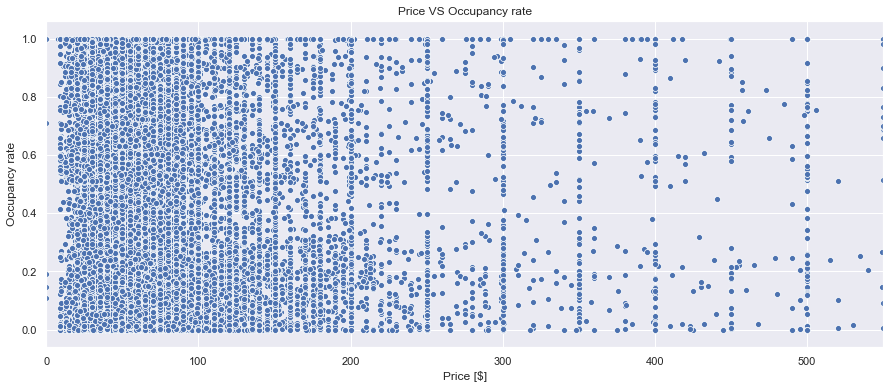

In [112]:
# Availability vs price
sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.scatterplot(x="price", y="occ_rate", data=listings)
ax.set(xlim=(0, 550))
ax.set_xlabel('Price [$]')
ax.set_ylabel('Occupancy rate')
ax.set_title('Price VS Occupancy rate')

> There is no obvious link between price and occupancy rate

Text(0.5, 1.0, 'Rating VS Occupancy rate')

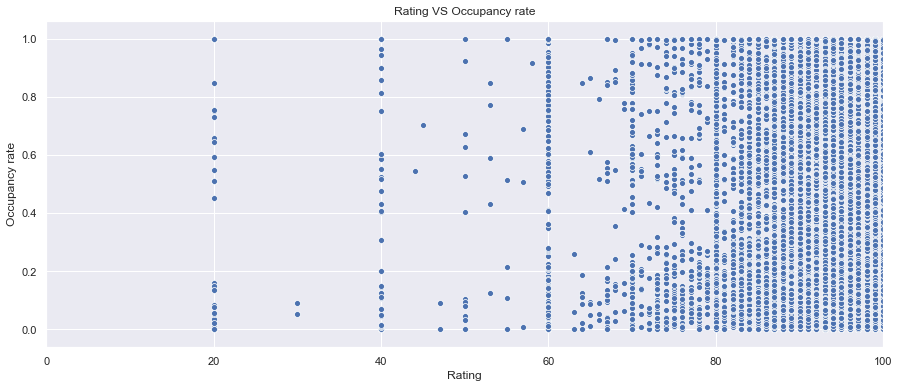

In [113]:
# Availability vs Rating
sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.scatterplot(x="review_scores_rating", y="occ_rate", data=listings_raw)
ax.set(xlim=(0, 100))
ax.set_xlabel('Rating')
ax.set_ylabel('Occupancy rate')
ax.set_title('Rating VS Occupancy rate')

> Similarly to Availability vs Price, it seems there is no relationship between Rating and Occupancy rate

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

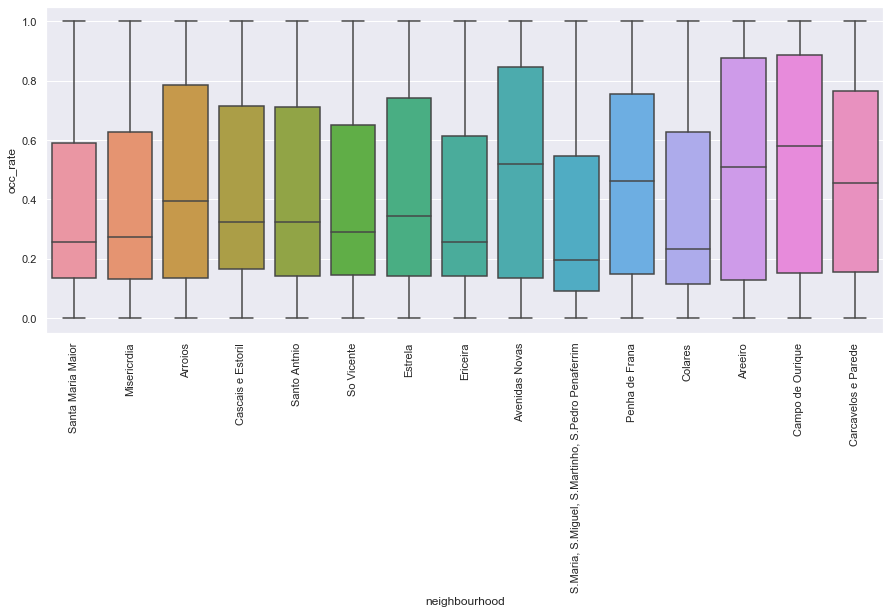

In [114]:
# Availability vs location
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="neighbourhood", y="occ_rate", data=listings_lite, order = listings_lite.neighbourhood.value_counts().iloc[:15].index)
plt.xticks(rotation=90)

> As it is possible to see, there are some neighbourhoods with higher occupancy rate (lower availability):
- Avenidas Novas, Areeiro, Campo de Ourique, Penha de Franca and Carcavelos e Parede stand out with lower Availability

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

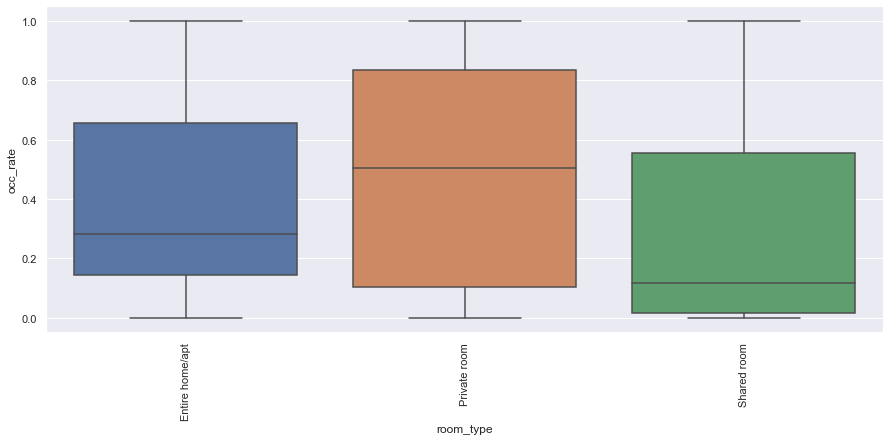

In [115]:
# Availability vs room type
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="room_type", y="occ_rate", data=listings_lite)
plt.xticks(rotation=90)

> It is interesting to see that the room type with lower availability is 'private room'.
> Both 'Entire home/apt' and 'Private Room' have higher occupancy rate than 'Shared Room'

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

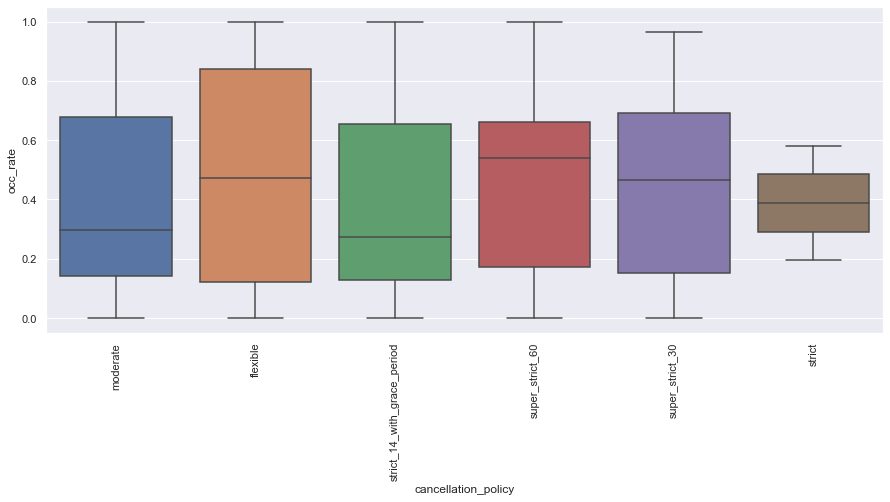

In [116]:
# Availability vs cancellation policy
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="cancellation_policy", y="occ_rate", data=listings_raw)
plt.xticks(rotation=90)

> Regarding cancellation policy, I would say a more flexible policy would be preferable. However, there is no obvious link between this feature and availability, since 'super strict 60' and 'super strict 30' (and 'flexible') have lower availability than the rest.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

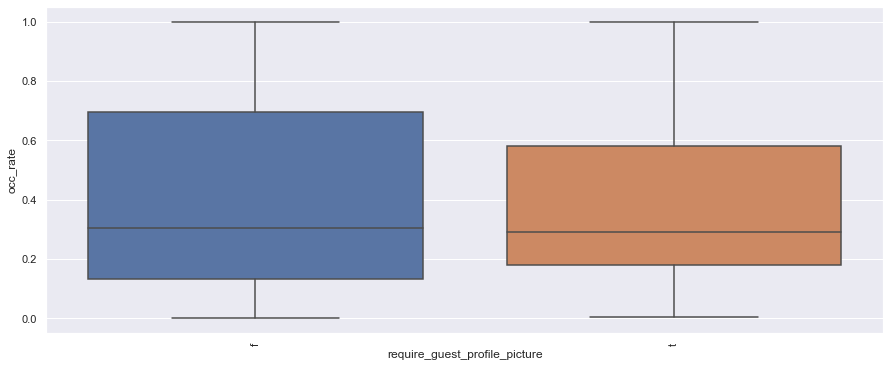

In [117]:
# Availability vs require guest profile picture
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="require_guest_profile_picture", y="occ_rate", data=listings_raw)
plt.xticks(rotation=90)

> No significant differences

(array([0, 1]), <a list of 2 Text xticklabel objects>)

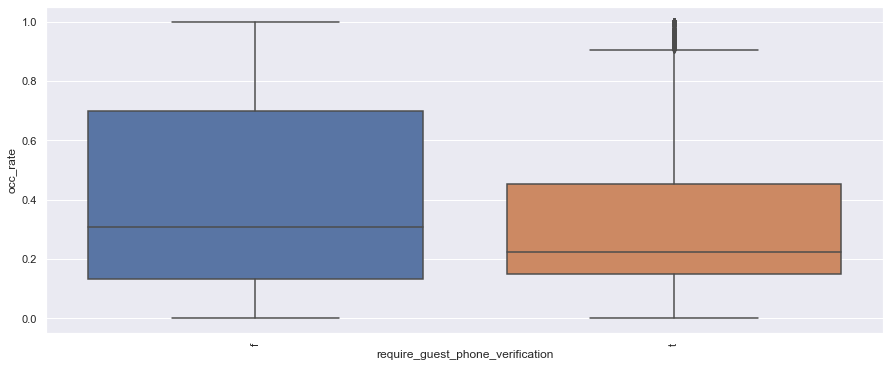

In [118]:
# Availability vs require guest phone verification
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="require_guest_phone_verification", y="occ_rate", data=listings_raw)
plt.xticks(rotation=90)

> The listings which do not require guest phone verification have higher occupancy rate.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

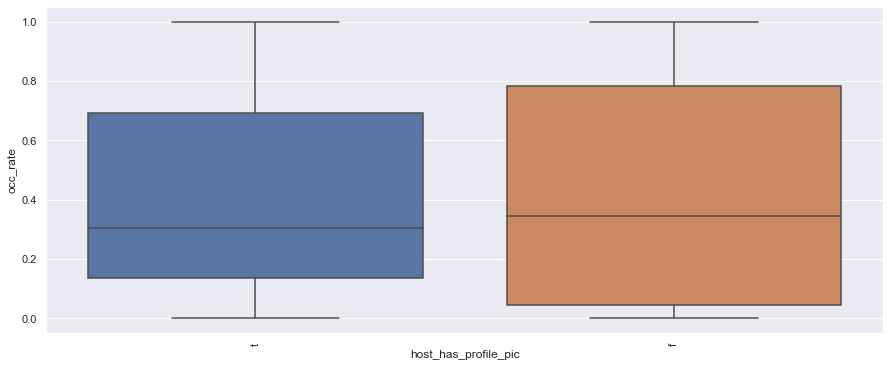

In [119]:
# Availability vs host has profile pic
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="host_has_profile_pic", y="occ_rate", data=listings_raw)
plt.xticks(rotation=90)

> No significant differences

(array([0, 1]), <a list of 2 Text xticklabel objects>)

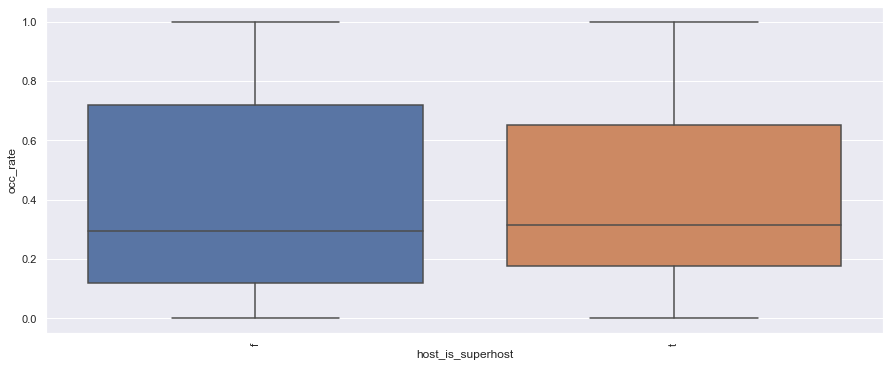

In [120]:
# Availability vs host is superhost
sns.set(rc={'figure.figsize':(15, 6)})
plt.subplots(1,1)
ax = sns.boxplot(x="host_is_superhost", y="occ_rate", data=listings_raw)
plt.xticks(rotation=90)

> No significant differences (being a super host show just a slightly higher occupancy rate)

#### III.5) Q5: Price preditction - main factors influencing price.
For this question I'll be using the listings snapshot available in _listings.csv_

In [121]:
# Removing remaining column with text
listings.drop(columns=['neighbourhood_cleansed'], inplace=True)
listings.drop(columns=['occ_rate'], inplace=True)
listings.drop(columns=['id'], inplace=True)

In [122]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(listings.drop(['price'], axis=1),listings['price'], test_size=0.25, random_state = 42)

In [123]:
# Gradient Boosting Regressor
gbreg = GradientBoostingRegressor()
gbreg.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
# Root mean square error - testing/hold out score
#print("RMSE - Training set:",np.sqrt(mean_squared_error(Y_train, gbreg.predict(X_train))))
#print("RMSE - Testing set:",np.sqrt(mean_squared_error(Y_test, gbreg.predict(X_test))))

[Text(0, 0.5, 'Predicted Price [$]'), Text(0.5, 0, 'Real Price [$]')]

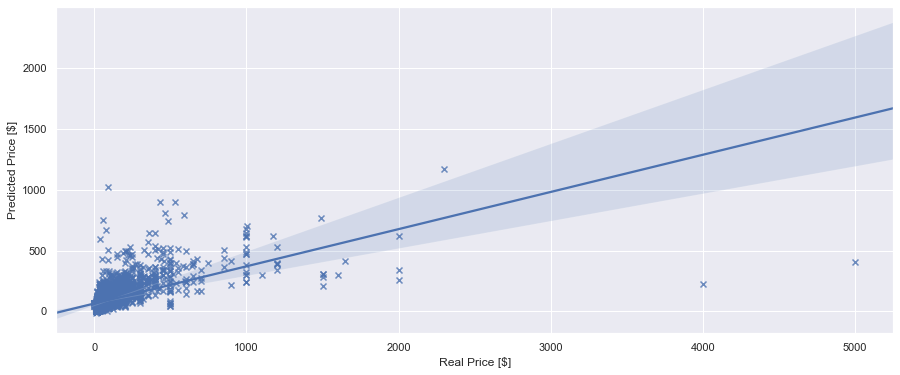

In [125]:
# Real vs Predicted price
sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.regplot(x=Y_test, y=gbreg.predict(X_test), marker="x")
ax.set(xlabel='Real Price [$]', ylabel='Predicted Price [$]')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

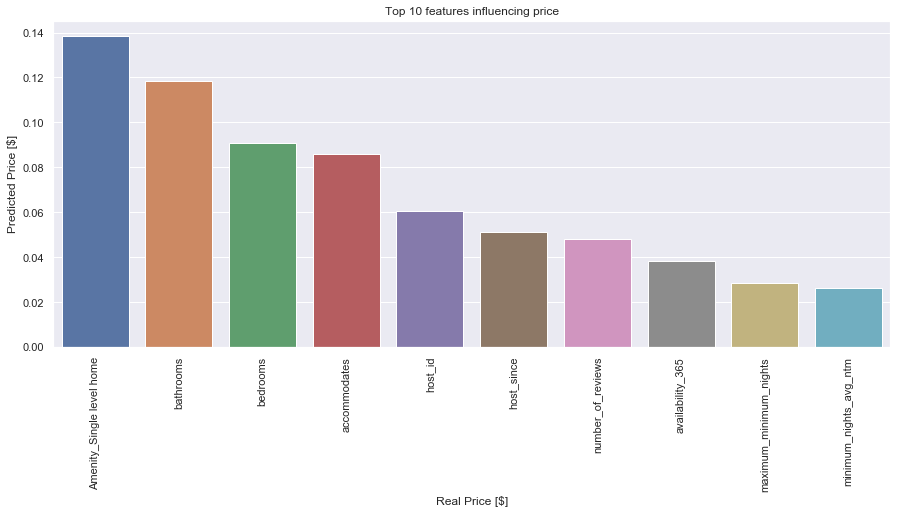

In [126]:
# get feature importances from the model and show top 10
headers = ["name", "score"]
values = sorted(zip(X_train.columns, gbreg.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

# top 10 features by score
features = feature_importances['name'][:10]
y_pos = np.arange(len(features))
scores = feature_importances['score'][:10]
 
sns.set(rc={'figure.figsize':(15, 6)})
ax = sns.barplot(x=features, y=scores)
ax.set(xlabel='Real Price [$]', ylabel='Predicted Price [$]', title='Top 10 features influencing price')
plt.xticks(rotation=90)

> The features which characterize the house/listing topology (bathrooms, bedrooms, accomodates) are on the top 5 of the top 10 important features, meaning these features have a high impact on the price.